In [1]:
#Ukraine-vs-Russia-Twitter-Sentiment-Analysis
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

from textblob import TextBlob

In [2]:
#Read Data
data = pd.read_csv(r"C:\Users\KIIT\Downloads\archive.zip")

df = pd.DataFrame(data)

print(df)

                        id      conversation_id               created_at  \
0      1609713284629807105  1609713284629807105  2023-01-02 00:48:48 UTC   
1      1609713284113907714  1609708650259677185  2023-01-02 00:48:48 UTC   
2      1609713280171253760  1609667082261512194  2023-01-02 00:48:47 UTC   
3      1609713279945019392  1609650672823140352  2023-01-02 00:48:47 UTC   
4      1609713274911875077  1609713274911875077  2023-01-02 00:48:46 UTC   
...                    ...                  ...                      ...   
10000  1609654036206161921  1609654036206161921  2023-01-01 20:53:22 UTC   
10001  1609654026219708416  1609575498056704001  2023-01-01 20:53:20 UTC   
10002  1609654020985192448  1609351691287121920  2023-01-01 20:53:19 UTC   
10003  1609654018002804741  1609654018002804741  2023-01-01 20:53:18 UTC   
10004  1609654012118179844  1609654012118179844  2023-01-01 20:53:17 UTC   

             date      time  timezone              user_id         username  \
0      2

In [3]:
#EDA
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1609713284629807105,1609713284629807105,2023-01-02 00:48:48 UTC,2023-01-02,00:48:48,0,1222975145977040896,gabimartinsa,Gabi,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1609713284113907714,1609708650259677185,2023-01-02 00:48:48 UTC,2023-01-02,00:48:48,0,1577723797561643032,petadactyl,Dactyl,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Chaleck', 'name': '🌻Check In...",NaN,NaN,NaN,NaN
2,1609713280171253760,1609667082261512194,2023-01-02 00:48:47 UTC,2023-01-02,00:48:47,0,1608106109247651843,valetaizong,Vale L'italiana,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NYCyrano', 'name': 'NYCyrano...",NaN,NaN,NaN,NaN
3,1609713279945019392,1609650672823140352,2023-01-02 00:48:47 UTC,2023-01-02,00:48:47,0,1603803888578138112,yieldingperry,Perry Yielding,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Brav0s', 'name': 'Brandon de...",NaN,NaN,NaN,NaN
4,1609713274911875077,1609713274911875077,2023-01-02 00:48:46 UTC,2023-01-02,00:48:46,0,1534540191498547200,jackcouteau,Jack Couteau 🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   1
place              10004
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9241
video                  0
thumbnail           8796
near               10005
geo                10005
source             10005
user_rt_id         10005
user_rt            10005
retweet_id         10005
reply_to               0
retweet_date       10005
translate          10005
trans_src          10005
trans_dest         10005
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10005 non-null  int64  
 1   conversation_id  10005 non-null  int64  
 2   created_at       10005 non-null  object 
 3   date             10005 non-null  object 
 4   time             10005 non-null  object 
 5   timezone         10005 non-null  int64  
 6   user_id          10005 non-null  int64  
 7   username         10005 non-null  object 
 8   name             10004 non-null  object 
 9   place            1 non-null      object 
 10  tweet            10005 non-null  object 
 11  language         10005 non-null  object 
 12  mentions         10005 non-null  object 
 13  urls             10005 non-null  object 
 14  photos           10005 non-null  object 
 15  replies_count    10005 non-null  int64  
 16  retweets_count   10005 non-null  int64  
 17  likes_count 

In [6]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
df["language"].value_counts()

en     8670
pt      357
it      289
qme     166
und      84
in       72
es       52
ca       40
ru       36
ja       28
fr       27
qht      26
de       24
th       16
pl       14
nl       14
sv       14
fi       12
et       11
ro        8
tr        5
cy        5
qam       5
uk        5
tl        4
vi        4
cs        3
no        2
zxx       1
zh        1
is        1
ar        1
eu        1
da        1
bn        1
ht        1
iw        1
fa        1
am        1
el        1
Name: language, dtype: int64

<Axes: >

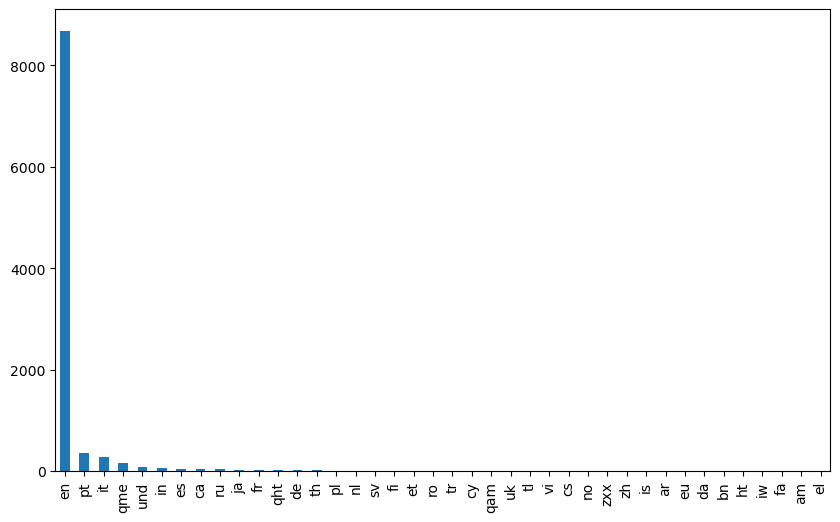

In [8]:
df.language.value_counts().plot(kind="bar",figsize=(10,6))

In [9]:
df=df[["username", "tweet", "language"]]

In [10]:
df.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

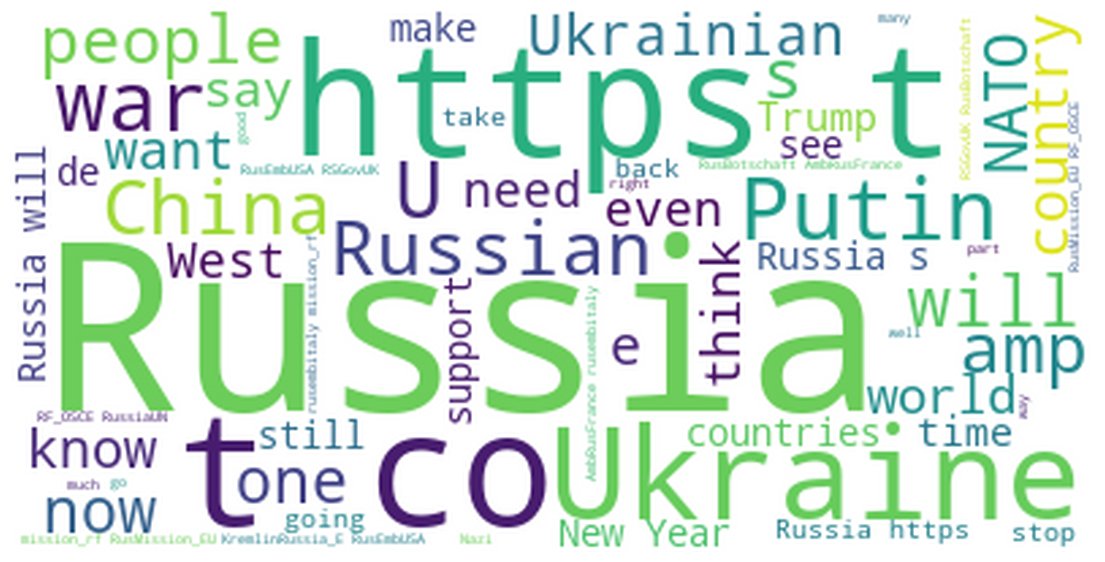

In [11]:
#Most Frequently Used Words
text = " ".join(i for i in df.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(14,10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [12]:
#Positive, Negative, and Neutral
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
df = df[["tweet", "Positive", "Negative", "Neutral"]]
print(df.head())

                                               tweet  Positive  Negative  \
0  Posse do Lula juntou representantes da Rússia ...     0.000     0.081   
1  @Chaleck Over more than Taiwan.  They hate The...     0.000     0.255   
2  @NYCyrano @ladyonorato @VeraVanHorne Questo è ...     0.000     0.000   
3  @Brav0s @DailyCaller Russia wont even own Russ...     0.000     0.000   
4  Russia is a terrorist state. Russia must be ex...     0.075     0.209   

   Neutral  
0    0.919  
1    0.745  
2    1.000  
3    1.000  
4    0.717  


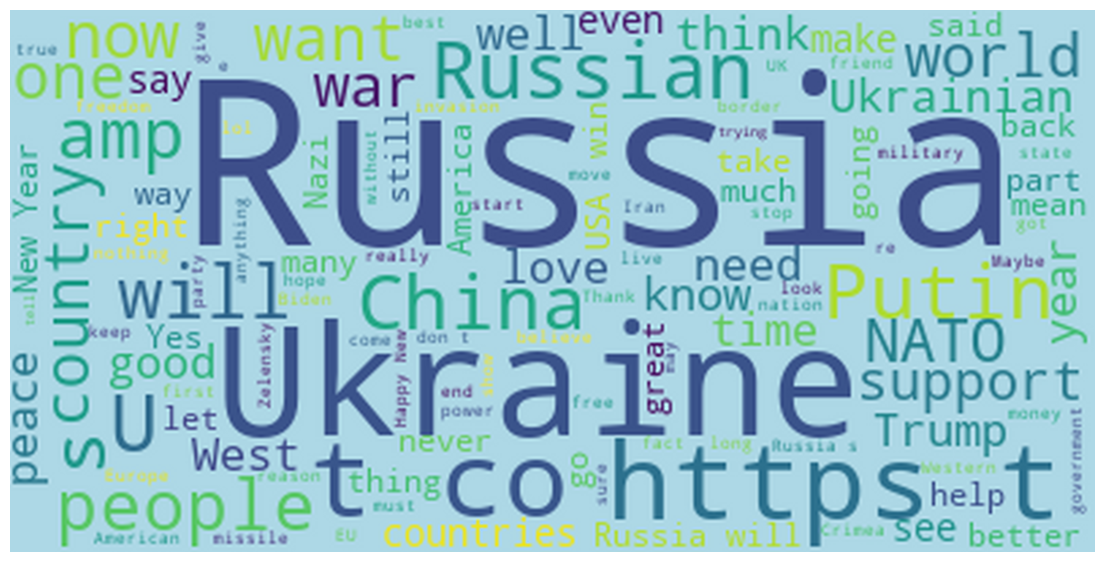

In [13]:
#Positive Sentiments
positive =' '.join([i for i in df['tweet'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#ADD8E6").generate(positive)
plt.figure( figsize=(14,10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

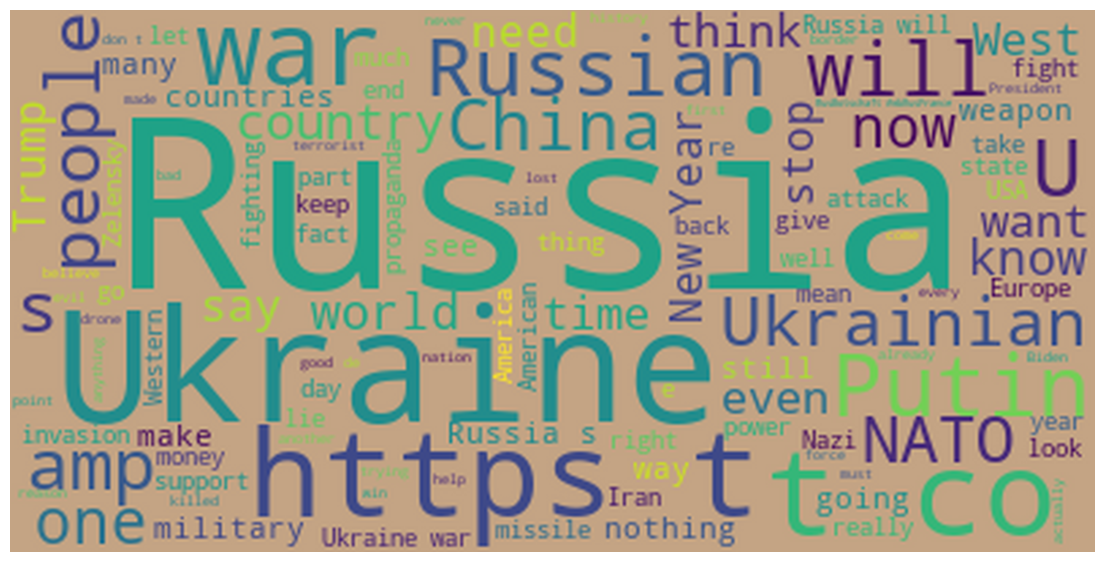

In [14]:
#Negative Sentiments
negative =' '.join([i for i in df['tweet'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#C4A484").generate(negative)
plt.figure( figsize=(14,10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()